In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
from tools import clean_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
os.getcwd()


'/Users/alhassanneahmedap59_cb/git/p6-ds'

Vendredi 9 - 12 - 2023
## P6-DS-OC | Classifier automatiquement des biens de consommation
---

<span style="color:#FFD700" font=10>**CONTEXT**</span>

 
Problem : peu d'efforts coté client sur l'upload des photos d'articles en vente entrainnant une mauvaise catégorisation des articles.

Mission : Faire une étude de faisabilité d'une automatisation de categorisation 

Objectif : faciliter la mise en ligne de nouveaux articles et la recherche de produits

</br>

<span style="color:#00FF00" font=10>**OUTILS**</span>

Un datasert d'articles contenant le nom de l'article, sa description et un lien de téléchargement de photo accompagné d'un notebook d’exemple d’étude de faisabilité.


</br>


<span style="color:#FF69B4" font=10>**TODO**</span>


Step 1 : Étude de faisabilité d'un model de catégorisation

1. Faire des analyses exploratoires sur les images ainsi que  les texts decrivant lmes articles.

2. Appliquer une reduction de dimension sur les images

3. Projecter sur un plan 2D pour analyser la possibilité de regrouper.

4. Définir d'évaluation pour confirmer les résultats.

5. Tester deux approches pour la feature extraction : bag-of-words et Tf-idf
6. Tester Bert avec une approhce word/sentence embedding
7. Tester USE



---

In [3]:
sns.set()


## Explo

In [4]:
df = pd.read_csv(("../data/flipkart_com-ecommerce_sample_1050.csv"))
df.head()


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [5]:
df.dtypes.value_counts()


object     12
float64     2
bool        1
Name: count, dtype: int64

In [6]:
df.describe(include=object)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,1050,1050,27,27,490,984
top,55b85ea15a1536d46b7190ad6fff8ce7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,1,1,889,889,11,22


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [8]:
df.nunique()


uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

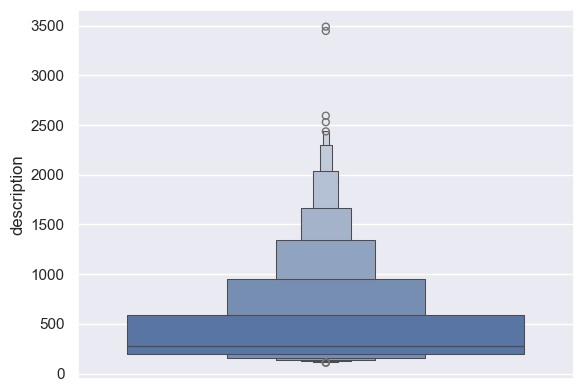

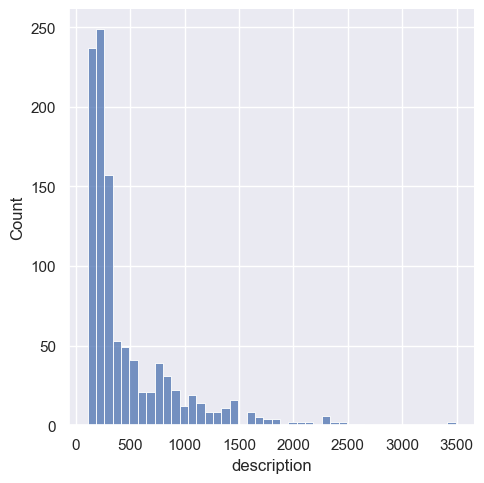

In [9]:
tmp = df.description.str.len()
sns.boxenplot(tmp)
plt.show()
sns.displot(tmp)
plt.show()


In [10]:
df = df.assign(category=lambda x: x["product_category_tree"].str.strip('"[]').str.split(" >> ", expand=True)[0], _len_description=tmp)
df.head()


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category,_len_description
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,1420
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,444
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,1258
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,858
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,1197


In [11]:
data = df[['description', 'category', '_len_description']]
data.head()


,description,category,_len_description
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,1420
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,444
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,1258
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,858
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,1197


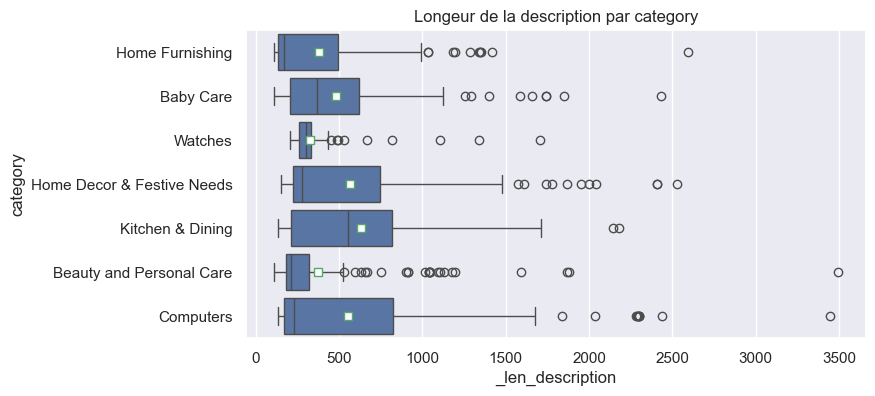

Table ANOVA :


,sum_sq,df,F,PR(>F)
category,1.203695e+07,6.0,10.063623,7.848605e-11
Residual,2.079194e+08,1043.0,NaN,NaN


p-value : 7.848605232002287e-11
L'hypothèse nulle est rejetée 	 ==> H1: Au moins une categorie a len desciption significativement différente.


In [12]:

# Test ANOVA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

plt.figure(figsize=(8,4))
meanprops={ "marker" : "s", "markerfacecolor" : "w"}
sns.boxplot(x=data._len_description, y=data.category,showmeans=True, meanprops=meanprops,orient='h')
plt.title('Longeur de la description par category')
plt.show()

model = smf.ols('_len_description ~ category', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('Table ANOVA :')
display(anova_table)

p_value = anova_table['PR(>F)'].loc['category']
print('p-value :', p_value)

if p_value < 0.05:
    print("L'hypothèse nulle est rejetée \t ==> H1: Au moins une categorie a len desciption significativement différente.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle H0 (La longeur de la description n'affecte pas la category).")


In [13]:
data.shape


(1050, 3)

In [14]:
raw_corpus = "".join(data.description.values)
_clean_corpus = clean_text((raw_corpus))
print(f"Before :{len(raw_corpus):.>{20}}\nAfter :{len(_clean_corpus):.>{21}}")


Before :..............497512
After :................48723


In [15]:
tmp=pd.Series(_clean_corpus).value_counts()
tmp


free        618
products    577
shipping    564
genuine     564
cash        564
           ... 
sunblock      1
carrot        1
anjeer        1
jovees        1
native        1
Name: count, Length: 4423, dtype: int64

In [16]:
tmp.head(30)


free           618
products       577
shipping       564
genuine        564
cash           564
price          559
replacement    559
day            553
guarantee      471
mug            425
online         396
buy            393
design         364
color          346
watch          335
pack           323
baby           321
type           318
set            306
material       306
cotton         297
box            296
general        288
product        285
package        271
analog         262
good           255
number         254
warranty       249
quality        245
Name: count, dtype: int64

In [17]:
tmp.tail(30)


beginning     1
ritual        1
convention    1
magical       1
ackey         1
keya          1
umbrella      1
posters       1
protector     1
christ        1
anthelios     1
posay         1
roche         1
spectrum      1
hydrate       1
aveeno        1
areas         1
exposed       1
sweden        1
protex        1
oriflame      1
consist       1
evotion       1
diffused      1
whiteherbs    1
sunblock      1
carrot        1
anjeer        1
jovees        1
native        1
Name: count, dtype: int64

<Axes: xlabel='None'>

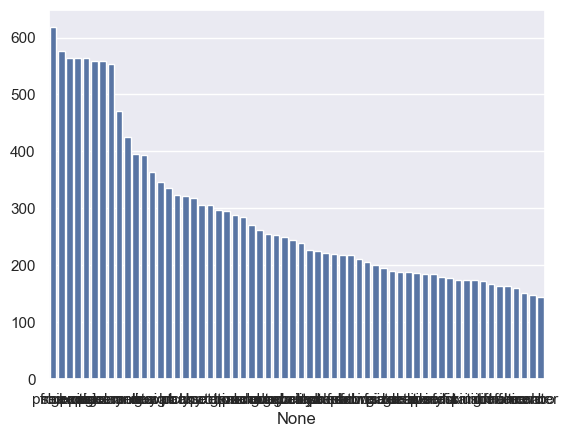

In [18]:
sns.barplot(x=tmp.index[:60], y=tmp.values[:60])


In [19]:
tmp.describe()


count    4423.000000
mean       11.015826
std        38.736229
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       618.000000
Name: count, dtype: float64

<Axes: ylabel='count'>

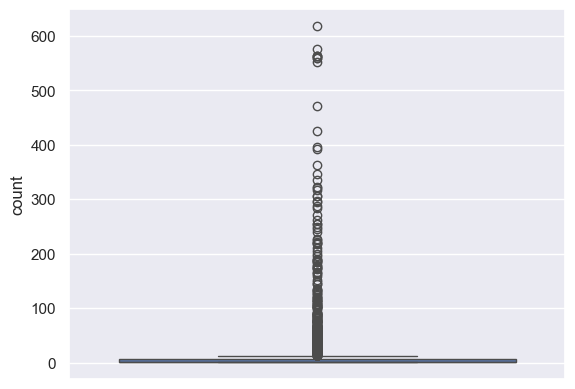

In [20]:
sns.boxplot(tmp)


In [21]:
unique_words = tmp[tmp==1]
unique_words


eternity             1
outcome              1
foremost             1
mandhania            1
washspecification    1
                    ..
sunblock             1
carrot               1
anjeer               1
jovees               1
native               1
Name: count, Length: 1403, dtype: int64

In [22]:
words_2 = tmp[tmp==2]
words_2


acid            2
neckline        2
colorskey       2
linekey         2
ultimate        2
               ..
rugged          2
inception       2
fantasy         2
returnfavors    2
distraction     2
Name: count, Length: 994, dtype: int64

In [23]:
extra = unique_words.index.append(words_2.index)
extra


Index(['eternity', 'outcome', 'foremost', 'mandhania', 'washspecification',
       'management', 'shortsspecification', 'stor', 'thrillers', 'housewarme',
       ...
       'stroller', 'rastogi', 'construction', 'holding', 'pschedelic',
       'rugged', 'inception', 'fantasy', 'returnfavors', 'distraction'],
      dtype='object', length=2397)

In [36]:
raw_corpus = "".join(data.description.values)
__clean_corpus = clean_text(raw_corpus, extra_words=extra)
print(f"Before{len(raw_corpus):.>{10}}  --  Now :{len(__clean_corpus):.>{10}}  --  Uniques :{len(set(__clean_corpus)):.>{10}}")


Before....497512  --  Now :.....45332  --  Uniques :......2026


In [25]:
len(set(__clean_corpus))


2026

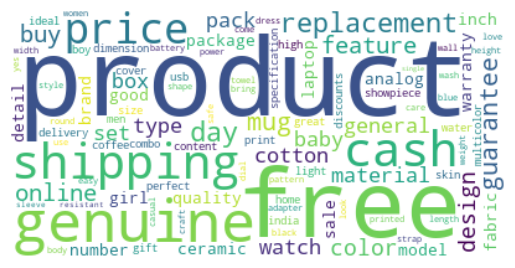

In [56]:
import wordcloud

def viz_wordcloud(corpus):
  wordcloud = WordCloud(background_color="white", collocations=False, max_words=100).generate(" ".join(corpus))

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


viz_wordcloud(__clean_corpus) 


In [57]:
data.category.unique()


array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

--------------------- Home Furnishing -------------------------


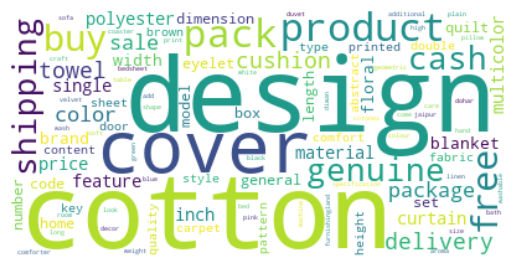

--------------------- Baby Care -------------------------


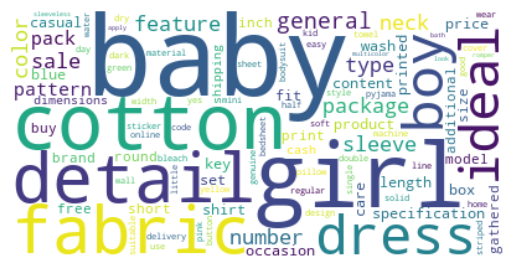

--------------------- Watches -------------------------


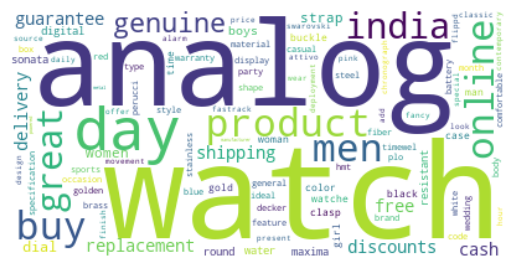

--------------------- Home Decor & Festive Needs -------------------------


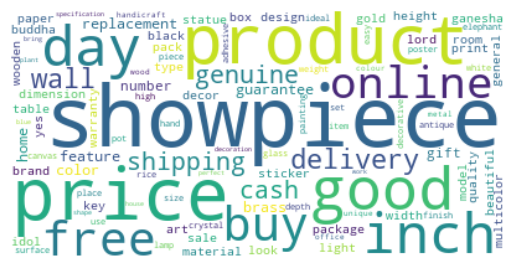

--------------------- Kitchen & Dining -------------------------


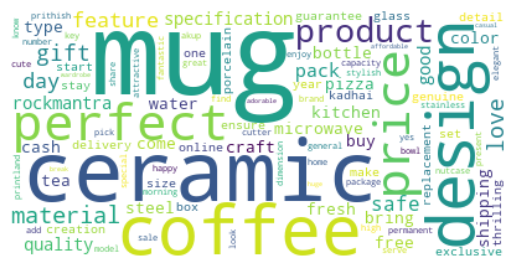

--------------------- Beauty and Personal Care -------------------------


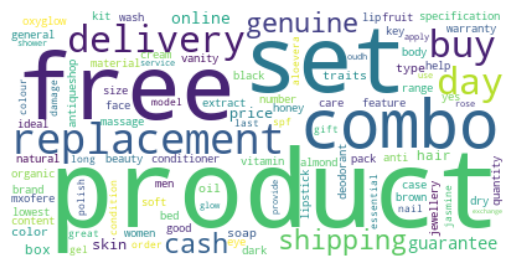

--------------------- Computers -------------------------


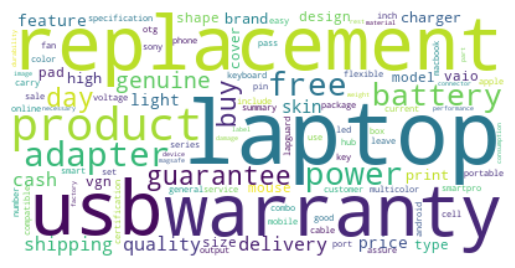

In [60]:
def divide_data(data, category):
  return " ".join(data[data.category==category].description.values)

for categ in data.category.unique():
  print(f"--------------------- {categ} -------------------------")
  viz_wordcloud(clean_text(divide_data(data, categ), extra_words=extra))
